In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from seaborn.relational import lineplot
from datetime import datetime

In [ ]:
forbes = pd.read_csv('/content/forbes-dataset-2020.csv')
forbes

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [ ]:


#Limpiamos columna Name
forbes['Name']= forbes['Name'].replace(['Aaron Rogers'],'Aaron Rodgers')
forbes['Name'] = forbes['Name'].str.upper()
#Limpiamos columna Nationality
forbes['Nationality']= forbes['Nationality'].replace(['Filipino'],'Philippines')
forbes['Nationality'] = forbes['Nationality'].str.upper()

#Limpiamos columna Sport
forbes['Sport'] = forbes['Sport'].str.upper()
forbes['Sport']= forbes['Sport'].replace(['AUTO RACING (NASCAR)'],'AUTO RACING')
forbes['Sport']= forbes['Sport'].replace(['NASCAR'],'AUTO RACING')
forbes['Sport']= forbes['Sport'].replace(['F1 MOTORSPORTS'],'AUTO RACING')
forbes['Sport']= forbes['Sport'].replace(['F1 RACING'],'AUTO RACING')
forbes['Sport']= forbes['Sport'].replace(['NBA'],'BASKETBALL')
forbes['Sport']= forbes['Sport'].replace(['NFL'],'AMERICAN FOOTBALL')
forbes['Sport']= forbes['Sport'].replace(['HOCKEY'],'ICE HOCKEY')
forbes['Sport']= forbes['Sport'].replace(['AMERICAN FOOTBALL / BASEBALL'],'AMERICAN FOOTBALL')
#Reemplazamos valores en Alex Rodriguez que aparece con dos Nacionalidades
forbes.iat[208, 2]='USA'

#Reemplazamos valores en SUGAR RAY LEONARD que aparece como golfista
forbes.iat[19, 5]= 'BOXING' 
forbes.iat[27, 5]='BOXING'
forbes.iat[57, 5]='BOXING'

#Reasignamos valores en la coluna Previous Year Rank
forbes["Previous Year Rank"].fillna(0, inplace=True)
forbes["Previous Year Rank"][forbes["Previous Year Rank"]=="not ranked"]=0
forbes["Previous Year Rank"][forbes["Previous Year Rank"]=="??"]=0
forbes["Previous Year Rank"][forbes["Previous Year Rank"]=="?"]=0
forbes["Previous Year Rank"][forbes["Previous Year Rank"]==">30"]=31
forbes["Previous Year Rank"][forbes["Previous Year Rank"]==">40"]=41
forbes["Previous Year Rank"][forbes["Previous Year Rank"]==">10"]=11
forbes["Previous Year Rank"][forbes["Previous Year Rank"]==">20"]=21
forbes["Previous Year Rank"][forbes["Previous Year Rank"]==">14"]=15
forbes["Previous Year Rank"][forbes["Previous Year Rank"]==">100"]=101
forbes["Previous Year Rank"][forbes["Previous Year Rank"]=="none"]=0
#Se elimina la columna S.NO
forbes.drop(columns=["S.NO"], inplace=True)
forbes







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to b

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,MIKE TYSON,USA,1,0,BOXING,1990,28.6
1,BUSTER DOUGLAS,USA,2,0,BOXING,1990,26.0
2,SUGAR RAY LEONARD,USA,3,0,BOXING,1990,13.0
3,AYRTON SENNA,BRAZIL,4,0,AUTO RACING,1990,10.0
4,ALAIN PROST,FRANCE,5,0,AUTO RACING,1990,9.0
...,...,...,...,...,...,...,...
296,STEPHEN CURRY,USA,6,9,BASKETBALL,2020,74.4
297,KEVIN DURANT,USA,7,10,BASKETBALL,2020,63.9
298,TIGER WOODS,USA,8,11,GOLF,2020,62.3
299,KIRK COUSINS,USA,9,101,AMERICAN FOOTBALL,2020,60.5


In [ ]:

    
datoslimpios = forbes.copy()

datoslimpios.to_csv("datos_limpios.csv")


**Atleta con el menor número de apariciones y mayores ganancias.**

In [ ]:
total_earnings = forbes.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = forbes['Name'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)

compare = total_earnings.merge(top_ranks, on='Name')
compare

least_listed_athlete = compare[compare ['Rank_counts'] == min(compare['Rank_counts'])].sort_values(by='earnings ($ million)', ascending=False)
least_listed_athlete.head(10)

,Name,earnings ($ million),Rank_counts
12,CONOR MCGREGOR,99.0,1
9,CANELO ALVAREZ,94.0,1
70,RUSSELL WILSON,89.5,1
41,KIRK COUSINS,60.5,1
50,MATTHEW STAFFORD,59.5,1
10,CARSON WENTZ,59.1,1
60,NOVAK DJOKOVIC,55.8,1
57,MUHAMMAD ALI,55.0,1
8,CAM NEWTON,53.1,1
37,JORDAN SPIETH,52.8,1


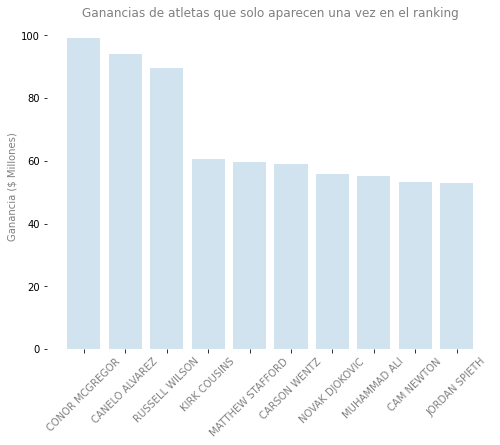

In [ ]:
fig = plt.figure(figsize =(8, 6))
plt.bar(least_listed_athlete["Name"].head(10), least_listed_athlete["earnings ($ million)"].head(10), align='center', alpha=0.2, edgecolor = "none")
plt.box(False)

#Titulos
plt.title("Ganancias de atletas que solo aparecen una vez en el ranking", color="#808080")
plt.ylabel("Ganancia ($ Millones)", color="#808080")


#Etiquetas
plt.xticks(fontsize=10, color="#808080",rotation=45)
plt.yticks(fontsize=10, color="#000000")

plt.show()

**País con mayor número de deportes con atletas en el dataset.**

In [ ]:
total_sports = forbes[[ 'Name', 'Sport', 'Nationality']].groupby(['Nationality', 'Sport', 'Name']).sum().reset_index()
name_ranks = total_sports['Name'].value_counts().to_frame().reset_index()
name_ranks.rename(columns={'index':'Name',
                          'Name':'Num_Athletes'}, inplace=True)
compare_ts_nr = total_sports.merge(name_ranks, on='Name')
compare_ts_nr.drop(columns=["Name"], inplace=True)

country_highest_numbersports_athletes = compare_ts_nr.groupby(['Nationality','Sport']).sum().reset_index()
country_highest_numbersports= country_highest_numbersports_athletes.assign(Num_Sports=1).drop(columns="Num_Athletes")
country_highest_numbersports = country_highest_numbersports.groupby(['Nationality']).sum().reset_index().sort_values(by='Num_Sports', ascending=False)
country_highest_numbersports


,Nationality,Num_Sports
19,USA,8
4,CANADA,3
18,UK,2
3,BRAZIL,2
11,NORTHERN IRELAND,1
17,SWITZERLAND,1
16,SPAIN,1
15,SERBIA,1
14,RUSSIA,1
13,PORTUGAL,1


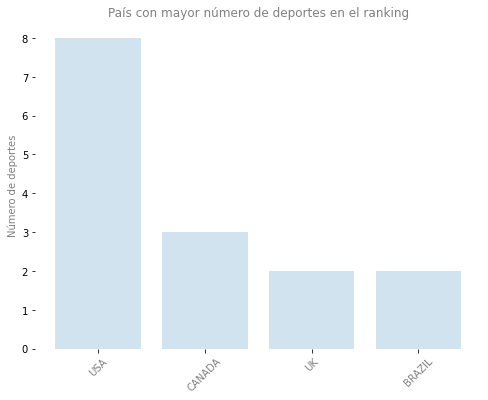

In [ ]:
fig = plt.figure(figsize =(8, 6))
plt.bar(country_highest_numbersports["Nationality"].head(4), country_highest_numbersports["Num_Sports"].head(4), align='center', alpha=0.2, edgecolor = "none")
plt.box(False)

#Titulos
plt.title("País con mayor número de deportes en el ranking", color="#808080")
plt.ylabel("Número de deportes", color="#808080")


#Etiquetas
plt.xticks(fontsize=10, color="#808080",rotation=45)
plt.yticks(fontsize=10, color="#000000")

plt.show()

**¿Cuántos atletas por deporte tiene cada país?**

In [121]:
total_athletes_bysport = forbes[[ 'Name', 'Sport', 'Nationality']].groupby(['Nationality', 'Sport', 'Name']).sum().reset_index()
num_athletes = total_sports['Name'].value_counts().to_frame().reset_index()
num_athletes.rename(columns={'index':'Name',
                          'Name':'Num_Athletes'}, inplace=True)
compare_tabs_na = total_athletes_bysport.merge(name_ranks, on='Name')
compare_tabs_na.drop(columns=["Name"], inplace=True)
athletes_bysports_bycountry = compare_tabs_na.groupby(['Nationality', 'Sport']).sum().reset_index()
athletes_bysports_bycountry

athletes_bysports_bycountry_pivot = athletes_bysports_bycountry.pivot_table(index='Nationality', columns='Sport', values='Num_Athletes').reset_index()
athletes_bysports_bycountry_pivot.fillna(0, inplace=True)
athletes_bysports_bycountry_pivot

Sport,Nationality,AMERICAN FOOTBALL,AUTO RACING,BASEBALL,BASKETBALL,BOXING,CYCLING,GOLF,ICE HOCKEY,MMA,MOTORCYCLE GP,SOCCER,TENNIS
0,ARGENTINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,AUSTRALIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,AUSTRIA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BRAZIL,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,CANADA,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
5,FINLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,FRANCE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,GERMANY,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,IRELAND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,ITALY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


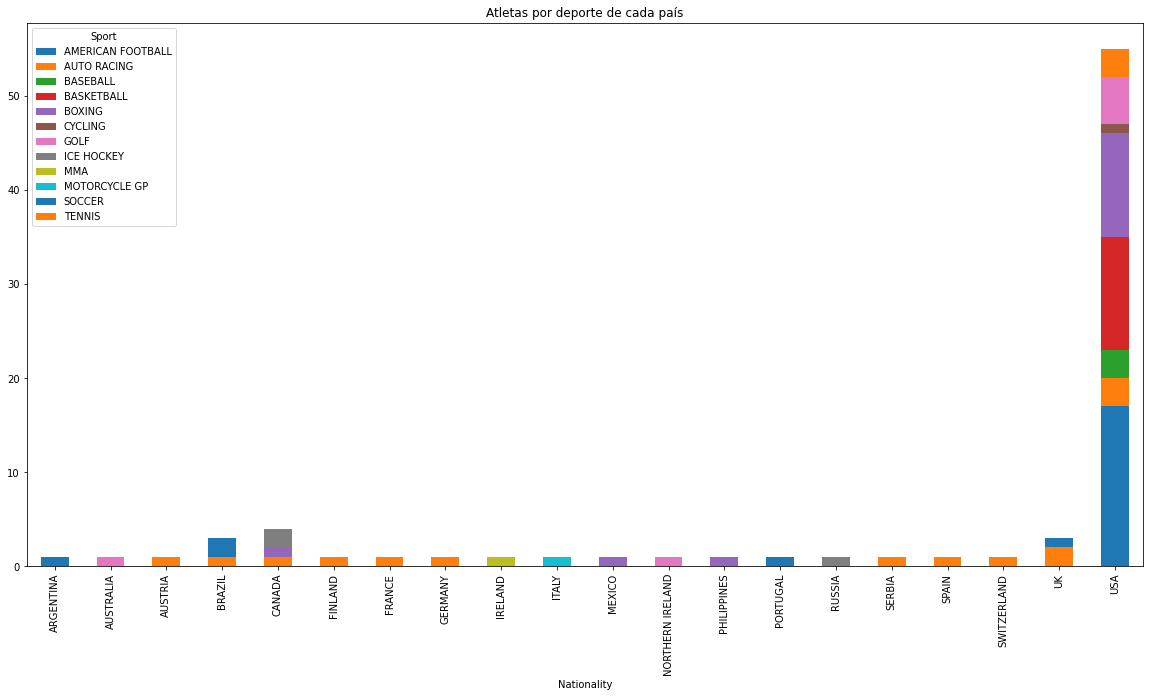

In [113]:
athletes_bysports_bycountry_pivot.plot(x='Nationality', 
        kind='bar', 
        stacked=True, 
        title='Atletas por deporte de cada país')
plt.gcf().set_size_inches(20, 10)

**Ganancia mínima y máxima (dentro del dataset) por deporte y por país.**

In [ ]:
max_sport_total_earnings = forbes.groupby('Sport')['earnings ($ million)'].max().to_frame().reset_index()
max_sport_total_earnings.rename(columns={'earnings ($ million)':'Max earnings ($ million)'}, inplace=True)

min_sport_total_earnings = forbes.groupby('Sport')['earnings ($ million)'].min().to_frame().reset_index()
min_sport_total_earnings.rename(columns={'earnings ($ million)':'Min earnings ($ million)'}, inplace=True)

compare_sport_total_earnings = min_sport_total_earnings.merge(max_sport_total_earnings, on='Sport')
compare_sport_total_earnings

,Sport,Min earnings ($ million),Max earnings ($ million)
0,AMERICAN FOOTBALL,9.5,89.5
1,AUTO RACING,9.0,80.0
2,BASEBALL,12.7,35.0
3,BASKETBALL,8.1,89.0
4,BOXING,8.1,300.0
5,CYCLING,28.0,28.0
6,GOLF,8.1,115.0
7,ICE HOCKEY,13.5,29.8
8,MMA,99.0,99.0
9,MOTORCYCLE GP,28.0,35.0


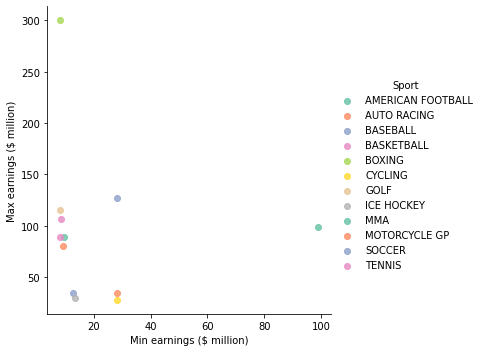

In [ ]:
sns.lmplot(x = "Min earnings ($ million)", y = "Max earnings ($ million)", data = compare_sport_total_earnings, fit_reg= False, hue = 'Sport', palette = "Set2")

In [ ]:
max_national_total_earnings = forbes.groupby('Nationality')['earnings ($ million)'].max().to_frame().reset_index()
max_national_total_earnings.rename(columns={'earnings ($ million)':'Max earnings ($ million)'}, inplace=True)

min_national_total_earnings = forbes.groupby('Nationality')['earnings ($ million)'].min().to_frame().reset_index()
min_national_total_earnings.rename(columns={'earnings ($ million)':'Min earnings ($ million)'}, inplace=True)

compare_national_total_earnings = min_national_total_earnings.merge(max_national_total_earnings, on='Nationality')
compare_national_total_earnings

,Nationality,Min earnings ($ million),Max earnings ($ million)
0,ARGENTINA,32.3,127.0
1,AUSTRALIA,8.5,8.5
2,AUSTRIA,13.5,13.5
3,BRAZIL,10.0,105.0
4,CANADA,10.2,23.0
5,FINLAND,40.0,45.0
6,FRANCE,9.0,16.0
7,GERMANY,15.0,80.0
8,IRELAND,99.0,99.0
9,ITALY,28.0,35.0


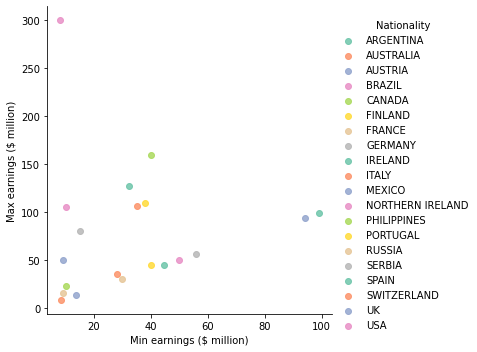

In [ ]:
sns.lmplot(x = "Min earnings ($ million)", y = "Max earnings ($ million)", data = compare_national_total_earnings, fit_reg= False, hue = 'Nationality', palette = "Set2")

**Atleta con mayores ganancias por deporte por década**

In [ ]:
bin = [1989, 1999, 2009, 2019, 2029]
label = ['1990s', '2000s', '2010s', '2020s']
decade = pd.cut(forbes['Year'], bins=bin, labels=label)
decade = pd.DataFrame(decade)
decade.columns=['Decade']
forbes_decade = pd.concat([forbes, decade], axis = 1)
forbes_decade


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),Decade
0,MIKE TYSON,USA,1,0,BOXING,1990,28.6,1990s
1,BUSTER DOUGLAS,USA,2,0,BOXING,1990,26.0,1990s
2,SUGAR RAY LEONARD,USA,3,0,BOXING,1990,13.0,1990s
3,AYRTON SENNA,BRAZIL,4,0,AUTO RACING,1990,10.0,1990s
4,ALAIN PROST,FRANCE,5,0,AUTO RACING,1990,9.0,1990s
...,...,...,...,...,...,...,...,...
296,STEPHEN CURRY,USA,6,9,BASKETBALL,2020,74.4,2020s
297,KEVIN DURANT,USA,7,10,BASKETBALL,2020,63.9,2020s
298,TIGER WOODS,USA,8,11,GOLF,2020,62.3,2020s
299,KIRK COUSINS,USA,9,101,AMERICAN FOOTBALL,2020,60.5,2020s


In [ ]:
athlete_earnings_by_decade = forbes_decade.groupby(['Sport', 'Decade', 'Name'])['earnings ($ million)'].sum().to_frame().reset_index()
athlete_earnings_by_decade = athlete_earnings_by_decade[athlete_earnings_by_decade['earnings ($ million)']>=1]
athlete_earnings_by_decade

,Sport,Decade,Name,earnings ($ million)
17,AMERICAN FOOTBALL,1990s,DEION SANDERS,22.5
22,AMERICAN FOOTBALL,1990s,EMMIT SMITH,16.5
35,AMERICAN FOOTBALL,1990s,JOE MONTANA,21.0
135,AMERICAN FOOTBALL,2000s,MICHAEL VICK,37.5
144,AMERICAN FOOTBALL,2000s,PEYTON MANNING,42.0
...,...,...,...,...
3712,TENNIS,2000s,ROGER FEDERER,35.0
3786,TENNIS,2010s,NOVAK DJOKOVIC,55.8
3791,TENNIS,2010s,RAFAEL NADAL,44.5
3793,TENNIS,2010s,ROGER FEDERER,639.8


In [ ]:
id_max = athlete_earnings_by_decade.groupby(['Decade', 'Sport'])['earnings ($ million)'].transform(max) == athlete_earnings_by_decade['earnings ($ million)']
max_athlete_earnings_by_decade = athlete_earnings_by_decade[id_max]
max_athlete_earnings_by_decade

,Sport,Decade,Name,earnings ($ million)
17,AMERICAN FOOTBALL,1990s,DEION SANDERS,22.5
144,AMERICAN FOOTBALL,2000s,PEYTON MANNING,42.0
162,AMERICAN FOOTBALL,2010s,AARON RODGERS,138.3
284,AMERICAN FOOTBALL,2020s,KIRK COUSINS,60.5
377,AUTO RACING,1990s,MICHAEL SCHUMACHER,170.0
458,AUTO RACING,2000s,MICHAEL SCHUMACHER,435.0
532,AUTO RACING,2010s,LEWIS HAMILTON,46.0
673,BASEBALL,1990s,GARY SHEFFIELD,17.2
731,BASEBALL,2000s,ALEX RODRIGUEZ,81.2
812,BASEBALL,2010s,ALEX RODRIGUEZ,35.0


In [ ]:
deportes=max_athlete_earnings_by_decade["Sport"].sort_values(ascending=True).unique()


In [ ]:
def plot_bestearnings_bysport(datos, deporte):

    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center')

    fig = plt.figure(figsize =(6, 3))
    bar_plot =plt.bar(datos["Decade"], datos["earnings ($ million)"], align='center', alpha=0.2, edgecolor = "none")
    plt.box(True)

    #Titulos
    plt.title("Deportista mejor pagado por decada en: "+ deporte, color="#808080")
    plt.xlabel("Decadas", color="#808080")
    plt.ylabel("Millones de DLLS", color="#808080")
    
    for ind in datos.index:
        plt.text(datos["Decade"][ind],datos["earnings ($ million)"][ind],datos["Name"][ind], ha = 'center', color="#000000", fontsize=8)

    #Etiquetas
    plt.xticks(fontsize=10, color="#808080")
    plt.yticks(fontsize=10, color="#808080")

    plt.show()

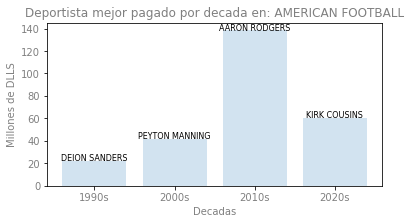

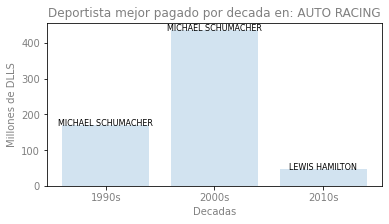

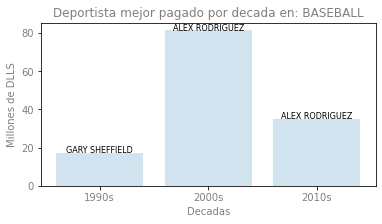

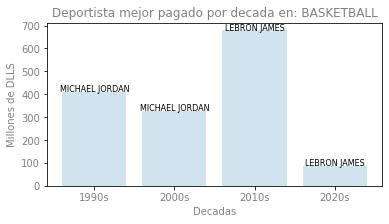

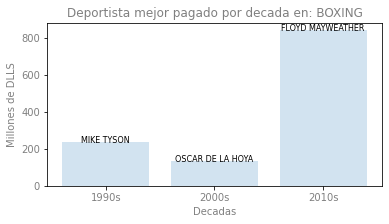

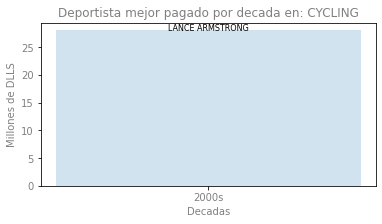

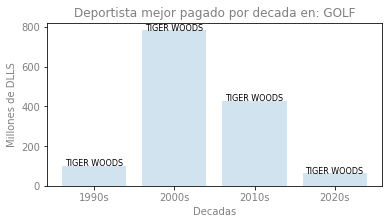

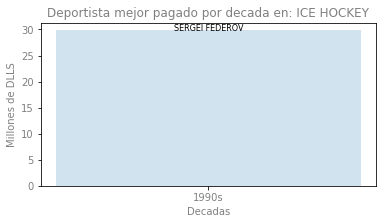

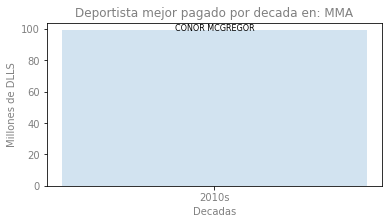

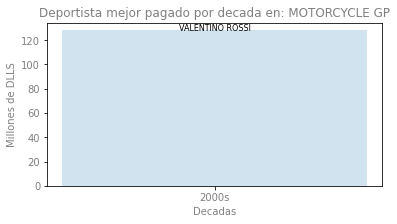

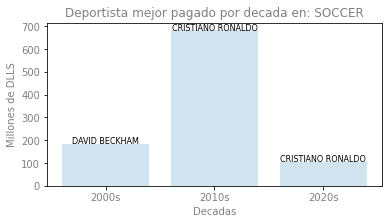

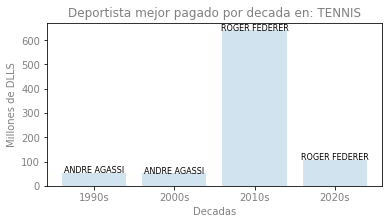

In [ ]:
for deporte in deportes:
    plot_bestearnings_bysport(max_athlete_earnings_by_decade[max_athlete_earnings_by_decade["Sport"]==deporte],deporte)

**Ganancia total por cada deporte por cada año**

In [ ]:
total_sports_earnings_by_year = forbes.groupby(['Sport', 'Year'])['earnings ($ million)'].sum().to_frame().reset_index()
total_sports_earnings_by_year

,Sport,Year,earnings ($ million)
0,AMERICAN FOOTBALL,1992,9.5
1,AMERICAN FOOTBALL,1993,11.5
2,AMERICAN FOOTBALL,1995,22.5
3,AMERICAN FOOTBALL,1996,16.5
4,AMERICAN FOOTBALL,2004,42.0
...,...,...,...
162,TENNIS,2016,123.6
163,TENNIS,2017,64.0
164,TENNIS,2018,77.2
165,TENNIS,2019,93.4


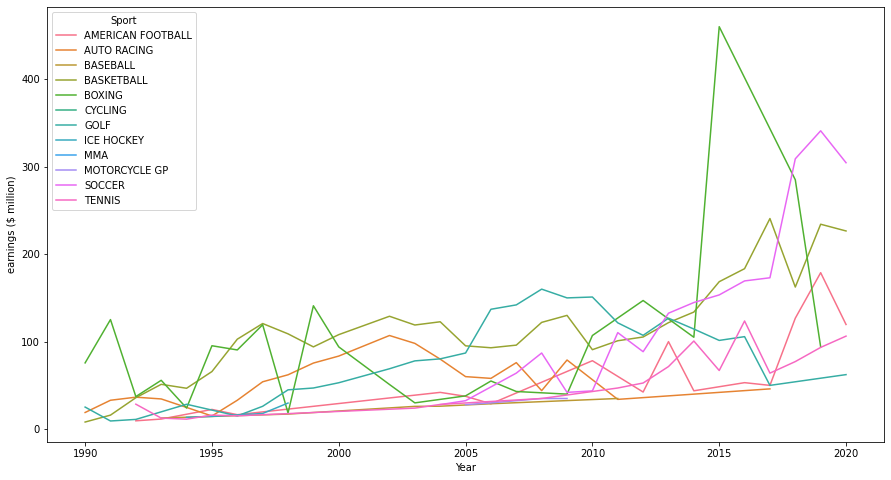

In [ ]:

#codigo aqui
sns.lineplot(x = "Year", y = "earnings ($ million)", hue='Sport', data = total_sports_earnings_by_year)
plt.gcf().set_size_inches(15, 8)